###download

In [1]:
#Download IMDB to the current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# Unzip
!tar zxf aclImdb_v1.tar.gz
# aclImdb / train / unsup is unlabeled and removed
!rm -rf aclImdb/train/unsup
# Show IMDB dataset description
!cat aclImdb/README

--2022-02-17 04:48:37--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  23.9MB/s    in 5.4s    

2022-02-17 04:48:42 (14.9 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

###Reading

In [287]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# Display of the correspondence between 0, 1 of the label and the meaning
print(train_review.target_names)

['neg', 'pos']


In [5]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [8]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()


df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [11]:
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


## Scratch implementation of BoW


In [126]:
data =["This movie is SOOOO funny!!!","What a movie! I never","best movie ever!!!!! this movie"]

In [127]:
import re
import numpy as np

lst =  [re.findall(r'(?u)\b\w+\b',i) for i in data]
newlst = list(set([item.lower() for sublist in lst for item in sublist]))
dataframe_1_gram = pd.DataFrame(np.zeros((len(data),len(newlst)),dtype =np.int),columns = newlst)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [128]:
dataframe_1_gram

,is,this,what,never,i,best,movie,soooo,funny,a,ever
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0


In [129]:
for i,sen in enumerate(lst):
  for w in sen:
    w = w.lower()
    dataframe_1_gram.loc[i,w] += 1
    

In [130]:
dataframe_1_gram

,is,this,what,never,i,best,movie,soooo,funny,a,ever
0,1,1,0,0,0,0,1,1,1,0,0
1,0,0,1,1,1,0,1,0,0,1,0
2,0,1,0,0,0,1,2,0,0,0,1


In [131]:
import regex as re
lst =[re.findall(r'(?u)\b\w+\b \b\w+\b',i.replace("!",""),overlapped=True) for i in data]
newlst = list(set([item.lower() for sublist in lst for item in sublist]))
dataframe_2_grams = pd.DataFrame(np.zeros((len(data),len(newlst)),dtype =np.int),columns = newlst)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [132]:
dataframe_2_grams

,movie i,i never,ever this,this movie,soooo funny,is soooo,a movie,what a,movie is,movie ever,best movie
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0


In [133]:
for i,sen in enumerate(lst):
  for w in sen:
    w = w.lower()
    dataframe_2_grams.loc[i,w] += 1

In [134]:
dataframe_2_grams

,movie i,i never,ever this,this movie,soooo funny,is soooo,a movie,what a,movie is,movie ever,best movie
0,0,0,0,1,1,1,0,0,1,0,0
1,1,1,0,0,0,0,1,1,0,0,0
2,0,0,1,1,0,0,0,0,0,1,1


###IDF

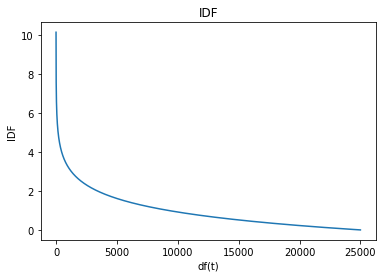

In [58]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

### Stop word

In [59]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [60]:
# Download Stopword for the first time
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',

In [61]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


## TF-IDF calculation


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [78]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000,norm=None)
x_train  = vectorizer.fit_transform(x_train)

## Learning using TF-IDF

In [79]:
vectorizer_test = TfidfVectorizer(stop_words=stop_words,
                                  max_features=5000,
                                  vocabulary=vectorizer.get_feature_names())
x_test = vectorizer_test.fit_transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [110]:
learning_rate = 0.001
batch_size = 25000
num_epochs = 20

n_hidden1 = 50
n_hidden2 = 100
n_classes = 1

In [111]:
from scipy import sparse
from tensorflow.keras import datasets, layers, models, Input
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
# model = Sequential()
model = models.Sequential()
model.add(Input(shape=(5000,), sparse=True))
model.add(tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(n_hidden2 ,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(n_classes, activation = tf.nn.sigmoid))


In [112]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# history = model.fit(x_train, y_train, epochs=num_epochs,batch_size=batch_size,
#                     validation_data=(x_test, y_test))

In [113]:

for i in range(num_epochs):
  results = model.train_on_batch(x_train, y_train)
  print("Epoch {} , loss: {} , accuracy: {}".format(i,results[0],results[1]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_9/dense_20/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_9/dense_20/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_9/dense_20/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


Epoch 0 , loss: 0.7377574443817139 , accuracy: 0.4963200092315674
Epoch 1 , loss: 0.6798713207244873 , accuracy: 0.5691999793052673
Epoch 2 , loss: 0.6404595971107483 , accuracy: 0.6521199941635132
Epoch 3 , loss: 0.5992186665534973 , accuracy: 0.7374399900436401
Epoch 4 , loss: 0.5607709884643555 , accuracy: 0.7910799980163574
Epoch 5 , loss: 0.5230653882026672 , accuracy: 0.8169199824333191
Epoch 6 , loss: 0.4851078987121582 , accuracy: 0.8327999711036682
Epoch 7 , loss: 0.44756704568862915 , accuracy: 0.8468000292778015
Epoch 8 , loss: 0.4130769670009613 , accuracy: 0.8577600121498108
Epoch 9 , loss: 0.3833855390548706 , accuracy: 0.8625199794769287
Epoch 10 , loss: 0.35639655590057373 , accuracy: 0.8700399994850159
Epoch 11 , loss: 0.33108383417129517 , accuracy: 0.8772000074386597
Epoch 12 , loss: 0.30849477648735046 , accuracy: 0.8850399851799011
Epoch 13 , loss: 0.28777503967285156 , accuracy: 0.892799973487854
Epoch 14 , loss: 0.2678854167461395 , accuracy: 0.9009199738502502
E

In [114]:

results = model.test_on_batch(x_test, y_test)
print(" loss: {} , accuracy: {}".format(results[0],results[1]))

 loss: 0.6554504632949829 , accuracy: 0.841759979724884


## Scratch mounting of TF-IDF

standard formular

In [172]:
tf = dataframe_1_gram.copy(deep=True)
idf = dataframe_1_gram.copy(deep=True)

In [173]:
for i in range(tf.shape[0]):
  tf.iloc[i,:] = tf.iloc[i,:] / tf.iloc[i,:].sum()

for i in range(idf.shape[1]):
  idf.iloc[:,i] = np.log(idf.shape[0]/idf.iloc[:,i].where(idf.iloc[:,i] != 0).count())


In [176]:
dataframe_1_gram

,is,this,what,never,i,best,movie,soooo,funny,a,ever
0,1,1,0,0,0,0,1,1,1,0,0
1,0,0,1,1,1,0,1,0,0,1,0
2,0,1,0,0,0,1,2,0,0,0,1


In [174]:
tf

,is,this,what,never,i,best,movie,soooo,funny,a,ever
0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.0,0.0
1,0.0,0.0,0.2,0.2,0.2,0.0,0.2,0.0,0.0,0.2,0.0
2,0.0,0.2,0.0,0.0,0.0,0.2,0.4,0.0,0.0,0.0,0.2


In [175]:
idf

,is,this,what,never,i,best,movie,soooo,funny,a,ever
0,1.098612,0.405465,1.098612,1.098612,1.098612,1.098612,0.0,1.098612,1.098612,1.098612,1.098612
1,1.098612,0.405465,1.098612,1.098612,1.098612,1.098612,0.0,1.098612,1.098612,1.098612,1.098612
2,1.098612,0.405465,1.098612,1.098612,1.098612,1.098612,0.0,1.098612,1.098612,1.098612,1.098612


In [177]:
tf * idf

,is,this,what,never,i,best,movie,soooo,funny,a,ever
0,0.219722,0.081093,0.000000,0.000000,0.000000,0.000000,0.0,0.219722,0.219722,0.000000,0.000000
1,0.000000,0.000000,0.219722,0.219722,0.219722,0.000000,0.0,0.000000,0.000000,0.219722,0.000000
2,0.000000,0.081093,0.000000,0.000000,0.000000,0.219722,0.0,0.000000,0.000000,0.000000,0.219722


scikit learn formular

In [178]:
tf_new = dataframe_1_gram.copy(deep=True)
idf_new = dataframe_1_gram.copy(deep=True)

In [179]:
for i in range(idf_new.shape[1]):
  idf_new.iloc[:,i] = np.log((idf_new.shape[0] + 1)/(1+idf_new.iloc[:,i].where(idf_new.iloc[:,i] != 0).count())) + 1

In [180]:
tf_new

,is,this,what,never,i,best,movie,soooo,funny,a,ever
0,1,1,0,0,0,0,1,1,1,0,0
1,0,0,1,1,1,0,1,0,0,1,0
2,0,1,0,0,0,1,2,0,0,0,1


In [181]:
idf_new

,is,this,what,never,i,best,movie,soooo,funny,a,ever
0,1.693147,1.287682,1.693147,1.693147,1.693147,1.693147,1.0,1.693147,1.693147,1.693147,1.693147
1,1.693147,1.287682,1.693147,1.693147,1.693147,1.693147,1.0,1.693147,1.693147,1.693147,1.693147
2,1.693147,1.287682,1.693147,1.693147,1.693147,1.693147,1.0,1.693147,1.693147,1.693147,1.693147


In [182]:
tf_new*idf_new

,is,this,what,never,i,best,movie,soooo,funny,a,ever
0,1.693147,1.287682,0.000000,0.000000,0.000000,0.000000,1.0,1.693147,1.693147,0.000000,0.000000
1,0.000000,0.000000,1.693147,1.693147,1.693147,0.000000,1.0,0.000000,0.000000,1.693147,0.000000
2,0.000000,1.287682,0.000000,0.000000,0.000000,1.693147,2.0,0.000000,0.000000,0.000000,1.693147


In [184]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # Set the number of dimensions to 10
model.build_vocab(sentences) # Preparation
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) #Learning

print("List of vocabulary : {}".format(model.wv.vocab.keys()))

for vocab in model.wv.vocab.keys():
  print("Vector of {}: \n{}".format(vocab, model.wv[vocab]))

List of vocabulary : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
Vector of this: 
[-0.03050412 -0.04685022  0.02604956 -0.00408308  0.02405742 -0.03767986
  0.01075227 -0.03031324  0.00627384 -0.00705161]
Vector of movie: 
[ 0.04324408 -0.01618237 -0.02107189  0.01486083 -0.03295517  0.02566765
 -0.01959305  0.00955491  0.04924276 -0.01304882]
Vector of is: 
[ 4.7986950e-03 -3.2146268e-02 -2.6375825e-02 -2.5985235e-05
 -3.7411261e-02  4.7442667e-02  3.2104600e-02 -4.4510197e-02
  2.9165829e-02  4.7842171e-02]
Vector of very: 
[-0.03221913  0.0100368   0.04595487  0.03876378 -0.04376356 -0.01509544
 -0.03123878  0.01258655 -0.0366125  -0.04276679]
Vector of good: 
[-0.00477336 -0.01665438 -0.03677507  0.00401872  0.04366107 -0.0306507
  0.0478135   0.03139272 -0.02157099 -0.04449479]
Vector of film: 
[-0.03746662  0.00395281  0.02956855  0.04900965  0.00582574  0.04492189
  0.01278717  0.00479012  0.02731944 -0.04706037]
Vector of a: 
[-0.01218106 -0.01035949 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [185]:
model.wv.most_similar(positive="good", topn=3)


[('bad', 0.34202849864959717),
 ('this', 0.22516123950481415),
 ('a', 0.2147819548845291)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


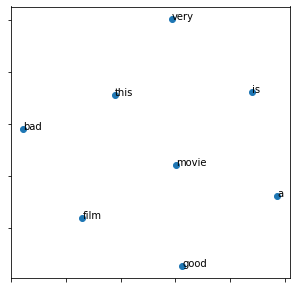

In [186]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.vocab.keys()

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

## Corpus pretreatment

In [310]:


train_review = load_files('./aclImdb/train/', encoding='utf-8')
train_x, train_y = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
test_x, test_y = test_review.data, test_review.target

In [311]:
for i , sen in enumerate(train_x):
  sen = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", sen) 
  sen = re.sub(r'<[^>]+>', " ", sen) 
  sen = re.sub(r"[^0-9a-zA-Z ]", "", sen) 
  sen = sen.lower()
  sen = sen.split(" ") 
  train_x[i] = sen
  

In [221]:
len(train_x)

25000

## Learning Word2Vec

In [312]:
model = Word2Vec(min_count=1, size=10) 
model.build_vocab(train_x) 
model.train(train_x, total_examples=model.corpus_count, epochs=model.iter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(22065616, 29221650)

## Vector visualization

In [208]:
vocabs = model.wv.vocab.keys()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

## Classification of movie reviews using Word2Vec


In [313]:
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x1, y1 = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x2, y2 = test_review.data, test_review.target

In [314]:
for i , sen in enumerate(x1):
  sen = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", sen) 
  sen = re.sub(r'<[^>]+>', " ", sen) 
  sen = re.sub(r"[^0-9a-zA-Z ]", "", sen) 
  sen = sen.lower()
  x1[i] = sen

In [315]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding

In [316]:
t = Tokenizer()
t.fit_on_texts(x1)

In [317]:
vocab_size = len(t.word_index) + 1

In [318]:
encoded_docs = t.texts_to_sequences(x1)
# print(encoded_docs)

In [319]:
list_len = [len(i.split(" ")) for i in x1]
max_length = max(list_len)

In [320]:
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [321]:
def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, 10))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = embedding.wv[word]
    return weight_matrix
embedding_vectors = get_weight_matrix(model, t.word_index)


In [322]:
e = Embedding(vocab_size, 10, weights=[embedding_vectors], input_length=max_length, trainable=False)


In [334]:
keras_model = Sequential()
keras_model.add(e)

keras_model.add(Flatten())
keras_model.add(tf.keras.layers.Dense(n_hidden1, activation = tf.nn.relu))
keras_model.add(tf.keras.layers.Dense(n_hidden2 ,activation = tf.nn.relu))
keras_model.add(tf.keras.layers.Dense(n_classes, activation = tf.nn.sigmoid))
# keras_model.add(Dense(1, activation='sigmoid'))

In [330]:
import tensorflow as tf

In [335]:
keras_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [336]:
keras_model.fit(padded_docs, y1, epochs=20)

Epoch 1/20
782/782 [==============================] - 11s 14ms/step - loss: 0.6664 - accuracy: 0.6019
Epoch 2/20
782/782 [==============================] - 11s 14ms/step - loss: 0.6097 - accuracy: 0.6647
Epoch 3/20
782/782 [==============================] - 11s 14ms/step - loss: 0.5568 - accuracy: 0.7002
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 0.4977 - accuracy: 0.7377
Epoch 5/20
782/782 [==============================] - 11s 14ms/step - loss: 0.4300 - accuracy: 0.7815
Epoch 6/20
782/782 [==============================] - 11s 14ms/step - loss: 0.3689 - accuracy: 0.8168
Epoch 7/20
782/782 [==============================] - 12s 15ms/step - loss: 0.3148 - accuracy: 0.8492
Epoch 8/20
782/782 [==============================] - 10s 13ms/step - loss: 0.2736 - accuracy: 0.8703
Epoch 9/20
782/782 [==============================] - 11s 13ms/step - loss: 0.2390 - accuracy: 0.8897
Epoch 10/20
782/782 [==============================] - 11s 13ms/step - loss: 0.217

In [337]:
t1 = Tokenizer()
t1.fit_on_texts(x2)

In [338]:
vocab_size1 = len(t1.word_index) + 1

In [339]:
encoded_docs1 = t1.texts_to_sequences(x2)


In [340]:
# list_len1 = [len(i.split(" ")) for i in x2]
# max_length1 = max(list_len1)

In [343]:
padded_docs1 = pad_sequences(encoded_docs1, maxlen=max_length, padding='post')

In [344]:
result = keras_model.predict(padded_docs1)

In [347]:
result = np.array(result >= 0.5,dtype = np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [348]:
from sklearn.metrics import accuracy_score
accuracy_score(y2,result)

0.50784

In [ ]:
# dir(model.wv.get_keras_embedding(train_embeddings=False)

In [228]:
# model.wv.get_keras_embedding(train_embeddings=False).input_dim

111453